**Problem Statement: This is the project which predicts the air quality levels  using maching learning classifiers.**


Created and trained the data set using 5 different classification machine learning algorithms which are Decision Tree, Logistic Regression, Random Forest, Support Vector Machine, K-NearestNeighbour.

The data is a regression data set, but classified it using PM2.5 values. Categorised PM2.5 values into categories into different air quality categories. I chose target variable as Air Quality which I categorised and chose feature variables as PM2.5, Year, Month, Day, Hour.

PROJECT ARCHITECTURE:

1.   Choosing the dataset , loading and preprocessing the data.
2.   After preprocessing the data, splitting the data into different catogeries.
3.   Creation of classification models and training the models.
4.   Visualising the data using bar plots and scatter plots.
5.   Results and comparison.

RESULTS:
The results are intrerpreted with classification reports, accuracy scores and cross validation scores. As per my results the *decision tree classifier* is the best classifier which predicted the data with utmost accuracy and performed exceptionally well.
1. If you prioritise interpretability and simplicity you can prefer the Decision Tree Classifier.
2. If you want the absolute best predictive performance and computational resources are not a constraint, the SVM Classifier is the best choice.

CONCLUSION:
Best Classifiers:
1. Decision Tree Classifier: This model showcased perfect accuracy and robust performance metrics for all classes. It is a strong contender, especially if interpretability is important.
2. SVM Classifier: The SVM model also demonstrated perfect accuracy and excellent performance metrics. SVM models tend to perform well in high-dimensional spaces and could be a suitable choice if computational resources allow.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/air-quality-india.csv')
print(df.head())

print("Last Top 5")
print(df.tail())

          Timestamp  Year  Month  Day  Hour   PM2.5
0  07-11-2017 12:00  2017     11    7    12   64.51
1  07-11-2017 13:00  2017     11    7    13   69.95
2  07-11-2017 14:00  2017     11    7    14   92.79
3  07-11-2017 15:00  2017     11    7    15  109.66
4  07-11-2017 16:00  2017     11    7    16  116.50
Last Top 5
              Timestamp  Year  Month  Day  Hour  PM2.5
36187  04-06-2022 11:00  2022      6    4    11  35.89
36188  04-06-2022 12:00  2022      6    4    12  33.83
36189  04-06-2022 13:00  2022      6    4    13  33.05
36190  04-06-2022 14:00  2022      6    4    14  35.29
36191  04-06-2022 15:00  2022      6    4    15  40.67


In [ ]:
# Define air quality categories based on PM2.5 thresholds
def categorize_air_quality(pm25):
    if pm25 <= 50:
        return 'Good'
    elif 50 < pm25 <= 100:
        return 'Moderate'
    elif 100 < pm25 <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif 150 < pm25 <= 200:
        return 'Unhealthy'
    elif 200 < pm25 <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# Apply the categorization function to create the 'Air Quality' column
df['Air Quality'] = df['PM2.5'].apply(categorize_air_quality)

# Feature selection (you can add more features if available)
features = ['PM2.5', 'Year', 'Month', 'Day', 'Hour']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Air Quality'], test_size=0.2, random_state=42)

# Create and train a Decision Tree Classifier with hyperparameter tuning
decision_tree_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_decision_tree = decision_tree_classifier.predict(X_test)

# Calculate accuracy for the Decision Tree Classifier
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Classifier Accuracy: {:.2f}%".format(accuracy_decision_tree * 100))



Decision Tree Classifier Accuracy: 100.00%


In [ ]:
# Display a classification report for the decision tree model
report_decision_tree = classification_report(y_test, y_pred_decision_tree)
print("Decision Tree Classifier:")
print(report_decision_tree)


Decision Tree Classifier:
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      4136
                      Moderate       1.00      1.00      1.00      2852
                     Unhealthy       1.00      1.00      1.00         7
Unhealthy for Sensitive Groups       1.00      1.00      1.00       240
                Very Unhealthy       1.00      1.00      1.00         4

                      accuracy                           1.00      7239
                     macro avg       1.00      1.00      1.00      7239
                  weighted avg       1.00      1.00      1.00      7239



In [ ]:
# Evaluate Decision Tree Classifier with cross-validation
cross_val_scores_decision_tree = cross_val_score(decision_tree_classifier, df[features], df['Air Quality'], cv=5)
print("Decision Tree Classifier Cross-Validation Scores:")
print(cross_val_scores_decision_tree)

Decision Tree Classifier Cross-Validation Scores:
[0.99986186 1.         1.         1.         0.99986184]


In [ ]:
# Create and train a Logistic Regression model with hyperparameter tuning
logistic_regression_model = LogisticRegression(max_iter=5000, penalty='l2')  # L2 regularization
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test data using logistic regression
y_pred_logistic_regression = logistic_regression_model.predict(X_test)

# Calculate accuracy for the Logistic Regression Classifier
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print("Logistic Regression Classifier Accuracy: {:.2f}%".format(accuracy_logistic_regression * 100))


Logistic Regression Classifier Accuracy: 99.90%


In [ ]:
# Display a classification report for the logistic regression model
report_logistic_regression = classification_report(y_test, y_pred_logistic_regression)
print("Logistic Regression Classifier:")
print(report_logistic_regression)


Logistic Regression Classifier:
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      4136
                      Moderate       1.00      1.00      1.00      2852
                     Unhealthy       0.86      0.86      0.86         7
Unhealthy for Sensitive Groups       1.00      1.00      1.00       240
                Very Unhealthy       1.00      1.00      1.00         4

                      accuracy                           1.00      7239
                     macro avg       0.97      0.97      0.97      7239
                  weighted avg       1.00      1.00      1.00      7239



In [ ]:
# Evaluate Logistic Regression Classifier with cross-validation
cross_val_scores_logistic_regression = cross_val_score(logistic_regression_model, df[features], df['Air Quality'], cv=5)
print("Logistic Regression Classifier Cross-Validation Scores:")
print(cross_val_scores_logistic_regression)


Logistic Regression Classifier Cross-Validation Scores:
[0.99903302 0.99875673 0.99958552 0.99944736 0.99820392]


In [ ]:
# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: {:.2f}%".format(accuracy * 100))



Random Forest Accuracy: 99.97%


In [ ]:
# Generate classification report for Random Forest Classifier
report_random_forest = classification_report(y_test, y_pred)
print("\nRandom Forest Classifier:")
print(report_random_forest)



Random Forest Classifier:
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      4136
                      Moderate       1.00      1.00      1.00      2852
                     Unhealthy       0.86      0.86      0.86         7
Unhealthy for Sensitive Groups       1.00      1.00      1.00       240
                Very Unhealthy       0.75      0.75      0.75         4

                      accuracy                           1.00      7239
                     macro avg       0.92      0.92      0.92      7239
                  weighted avg       1.00      1.00      1.00      7239



In [ ]:
# Evaluate Random Forest Classifier with cross-validation
cross_val_scores_random_forest = cross_val_score(random_forest_model, df[features], df['Air Quality'], cv=5)
print("Random Forest Classifier Cross-Validation Scores:")
print(cross_val_scores_random_forest)



Random Forest Classifier Cross-Validation Scores:
[1.         0.99958558 0.99944736 0.99944736 0.99889472]


In [ ]:
# Create and train the Support Vector Machine model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy: {:.2f}%".format(accuracy_svm * 100))


SVM Accuracy: 99.97%


In [ ]:
# Generate classification report for SVM Classifier
report_svm = classification_report(y_test, y_pred_svm)
print("\nSVM Classifier:")
print(report_svm)




SVM Classifier:
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      4136
                      Moderate       1.00      1.00      1.00      2852
                     Unhealthy       1.00      1.00      1.00         7
Unhealthy for Sensitive Groups       1.00      1.00      1.00       240
                Very Unhealthy       1.00      1.00      1.00         4

                      accuracy                           1.00      7239
                     macro avg       1.00      1.00      1.00      7239
                  weighted avg       1.00      1.00      1.00      7239



In [ ]:
# Evaluate SVM Classifier with cross-validation
cross_val_scores_svm = cross_val_score(svm_model, df[features], df['Air Quality'], cv=5)
print("SVM Classifier Cross-Validation Scores:")
print(cross_val_scores_svm)



SVM Classifier Cross-Validation Scores:
[0.99972372 0.99917116 0.99958552 0.99917104 0.9986184 ]


In [ ]:
# Create and train the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-NN Accuracy: {:.2f}%".format(accuracy_knn * 100))


K-NN Accuracy: 99.24%


In [ ]:
# Generate classification report for K-NN Classifier
report_knn = classification_report(y_test, y_pred_knn)
print("\nK-NN Classifier:")
print(report_knn)




K-NN Classifier:
                                precision    recall  f1-score   support

                          Good       1.00      0.99      1.00      4136
                      Moderate       0.99      0.99      0.99      2852
                     Unhealthy       0.83      0.71      0.77         7
Unhealthy for Sensitive Groups       0.97      0.97      0.97       240
                Very Unhealthy       1.00      0.75      0.86         4

                      accuracy                           0.99      7239
                     macro avg       0.96      0.88      0.92      7239
                  weighted avg       0.99      0.99      0.99      7239



In [ ]:
# Evaluate K-NN Classifier with cross-validation
cross_val_scores_knn = cross_val_score(knn_model, df[features], df['Air Quality'], cv=5)
print("K-NN Classifier Cross-Validation Scores:")
print(cross_val_scores_knn)


K-NN Classifier Cross-Validation Scores:
[0.98383755 0.98798177 0.99198674 0.99157226 0.98770379]


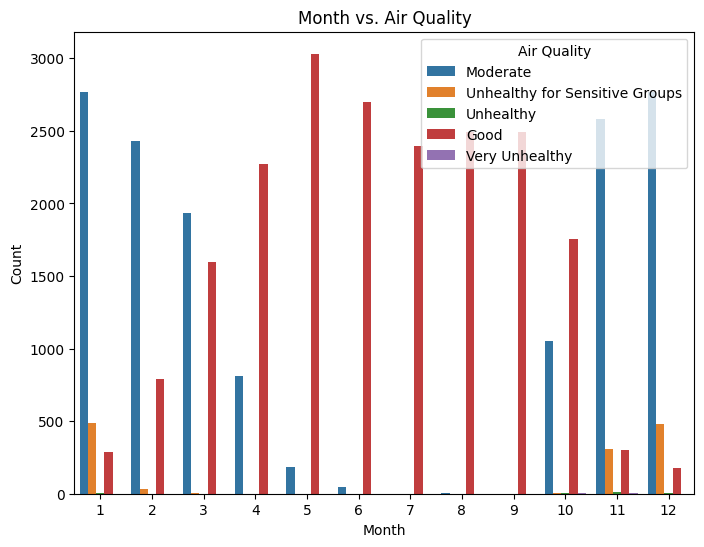

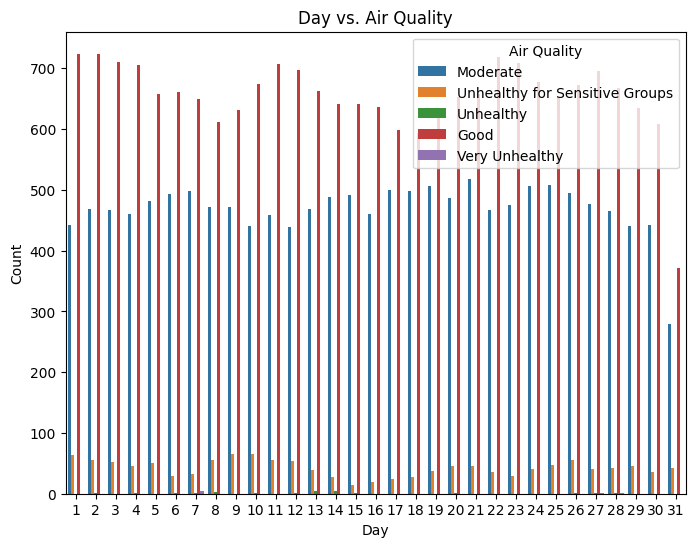

In [ ]:
# Create bar plots for categorical features
categorical_features = ['Month', 'Day']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Air Quality', data=df)
    plt.title(f'{feature} vs. Air Quality')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Air Quality', loc='upper right')
    plt.show()

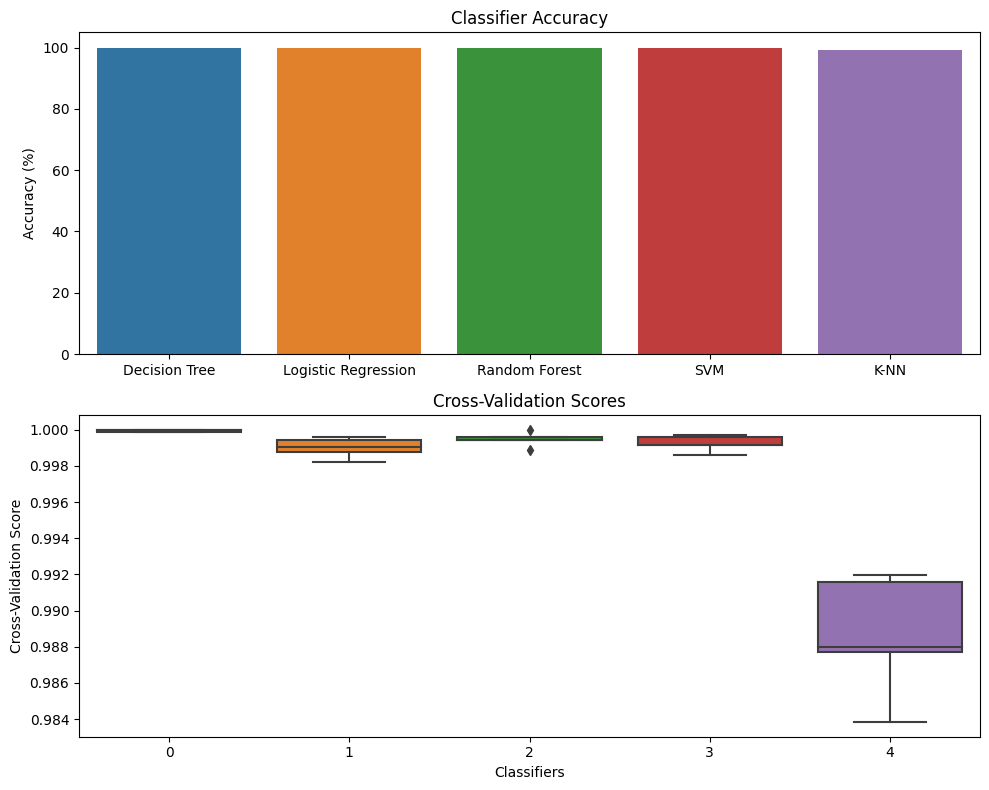

In [ ]:
# Create a list of classifier names
classifier_names = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'SVM', 'K-NN']

# Create a list of classifier models
classifiers = [decision_tree_classifier, logistic_regression_model, random_forest_model, svm_model, knn_model]

# Lists to store accuracy and cross-validation scores
accuracies = []
cross_val_scores = []

# Loop through each classifier
for classifier in classifiers:
    # Make predictions
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy * 100)  # store accuracy in percentage

    # Calculate cross-validation scores
    cross_val = cross_val_score(classifier, df[features], df['Air Quality'], cv=5)
    cross_val_scores.append(cross_val)

# Create subplots for accuracy and cross-validation scores
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot accuracy
sns.barplot(x=classifier_names, y=accuracies, ax=axes[0])
axes[0].set_title('Classifier Accuracy')
axes[0].set_ylabel('Accuracy (%)')

# Plot cross-validation scores
sns.boxplot(data=cross_val_scores, ax=axes[1])
axes[1].set_title('Cross-Validation Scores')
axes[1].set_xlabel('Classifiers')
axes[1].set_ylabel('Cross-Validation Score')

plt.tight_layout()
plt.show()


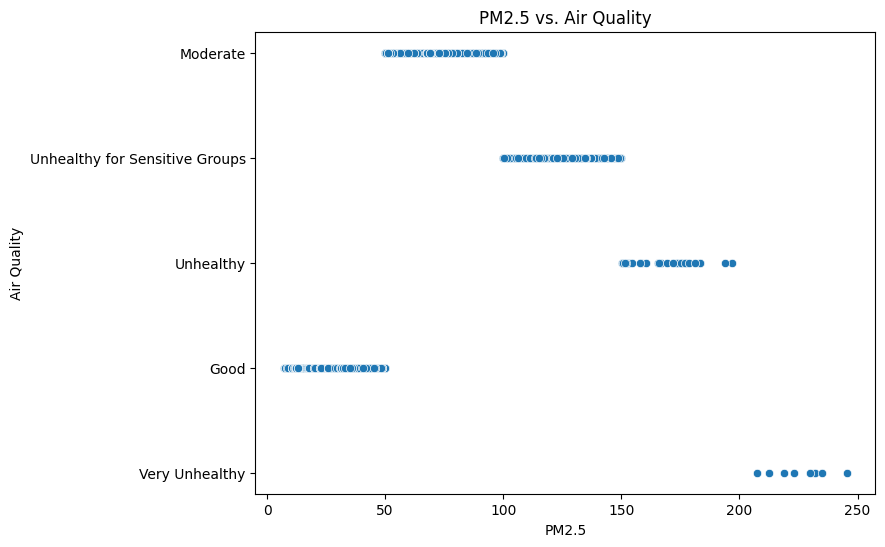

In [ ]:
# Create scatter plots for numerical features
numerical_features = ['PM2.5']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='Air Quality', data=df)
    plt.title(f'{feature} vs. Air Quality')
    plt.xlabel(feature)
    plt.ylabel('Air Quality')
    plt.show()